In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r'C:\Users\njhar\Downloads\ifood_df.csv')

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,283,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,166,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,151,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,0,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,0,0


In [5]:
#checking null values

In [6]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
#checking missing values

<Axes: >

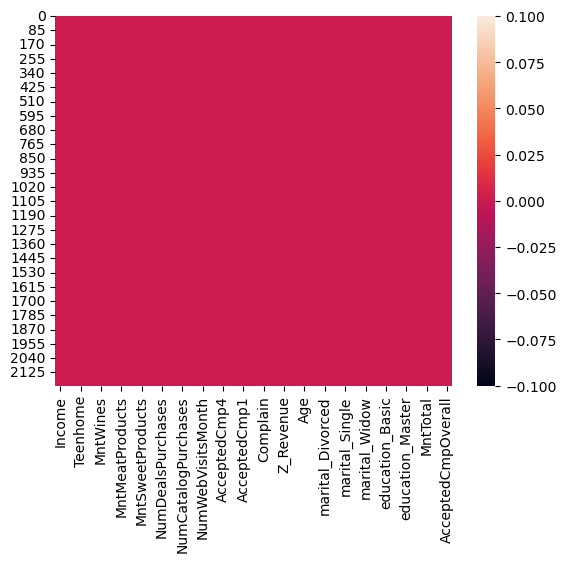

In [8]:
df.isna().sum()
sns.heatmap(df.isna())

In [9]:
#checking duplicated
df.duplicated().sum()

0

In [10]:
#checking unique values
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [11]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [12]:
# descriptive statistics
stats = ['Income','Age','Recency','NumDealsPurchases','MntTotal','MntRegularProds','AcceptedCmpOverall']
df1 = df[stats].copy()

In [13]:
df1.describe()

,Income,Age,Recency,NumDealsPurchases,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,51.095692,49.009070,2.318367,562.764626,519.251701,0.29932
std,20713.063826,11.705801,28.932111,1.886107,575.936911,553.336825,0.68044
min,1730.000000,24.000000,0.000000,0.000000,4.000000,0.000000,0.00000
25%,35196.000000,43.000000,24.000000,1.000000,56.000000,42.000000,0.00000
50%,51287.000000,50.000000,49.000000,2.000000,343.000000,288.000000,0.00000
75%,68281.000000,61.000000,74.000000,3.000000,964.000000,884.000000,0.00000
max,113734.000000,80.000000,99.000000,15.000000,2491.000000,2458.000000,4.00000


In [14]:
# correlation for stats

<Axes: >

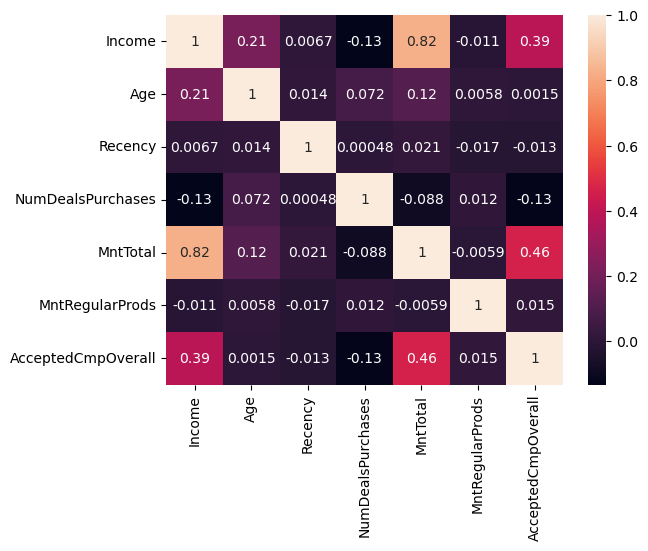

In [15]:
sns.heatmap(df1.corr(), annot = True)

In [22]:
# visualising some columns
# Total amount in purchase

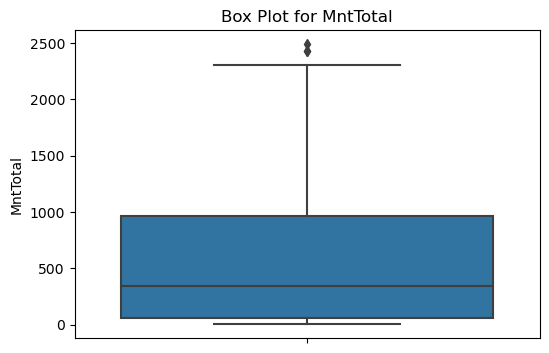

In [23]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

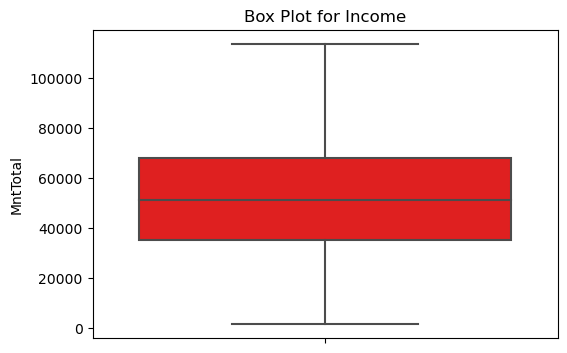

In [230]:
# Income
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='Income', color='red')
plt.title('Box Plot for Income')
plt.ylabel('MntTotal')
plt.show()

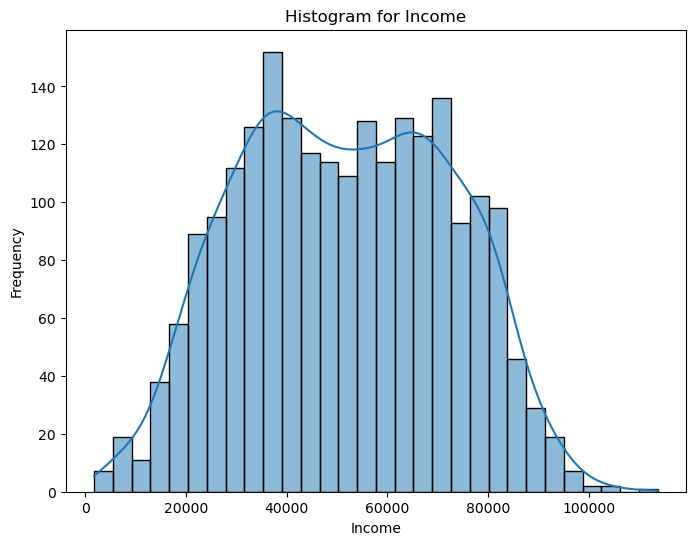

In [24]:
# income plot
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

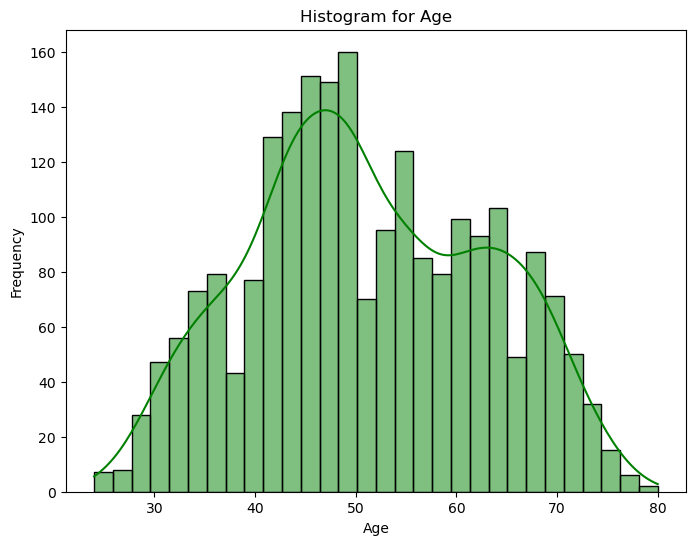

In [25]:
# age plot
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Age', bins=30, kde=True, color = 'green')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [180]:
# in realtionsip for married and couples only
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,products_pattern,In_relationship,purchase_patterns
0,58138,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,283,0,0,0,4
1,46344,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,166,0,6,0,5
2,71613,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,151,0,0,1,1
3,26646,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,0,0,0,1,2
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,0,0,0,1,3


C:\Users\njhar\AppData\Local\Temp\ipykernel_22484\535896423.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")


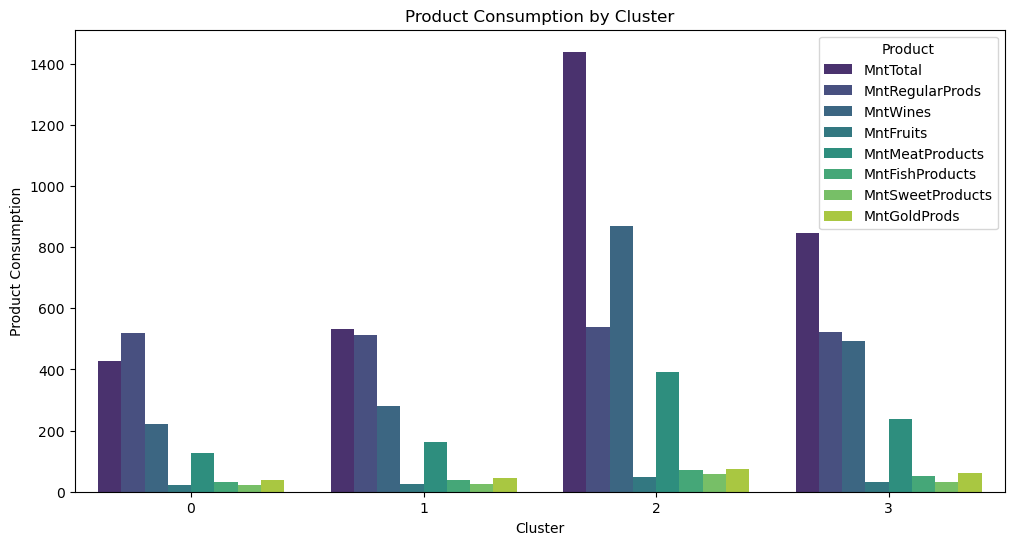

In [318]:
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mnt_data = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

# Product Consumption by Cluster
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

Text(0, 0.5, 'In_relationship')

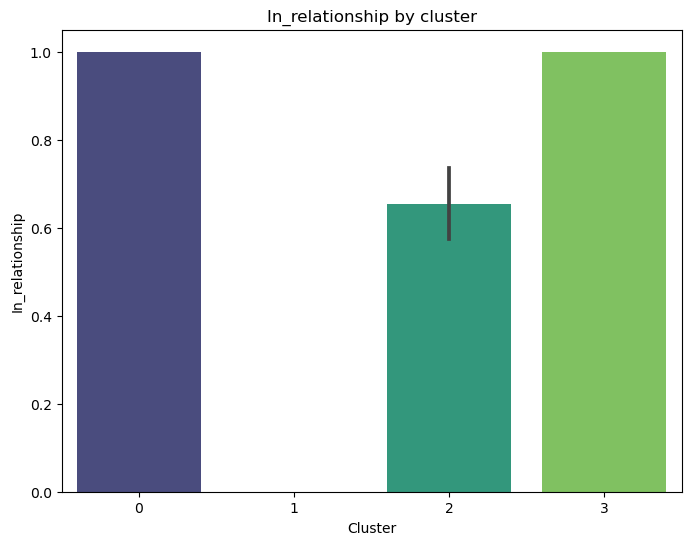

In [319]:
# In_relationship by customer
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

In [320]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

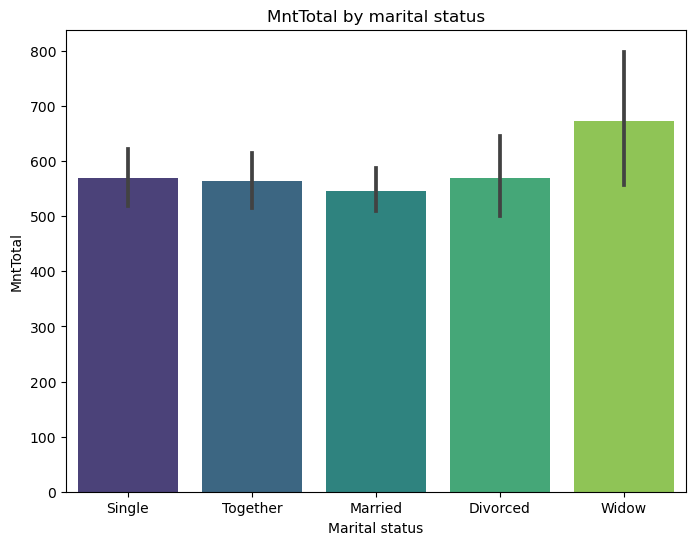

In [322]:
# plotting for maritial and mnt total
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

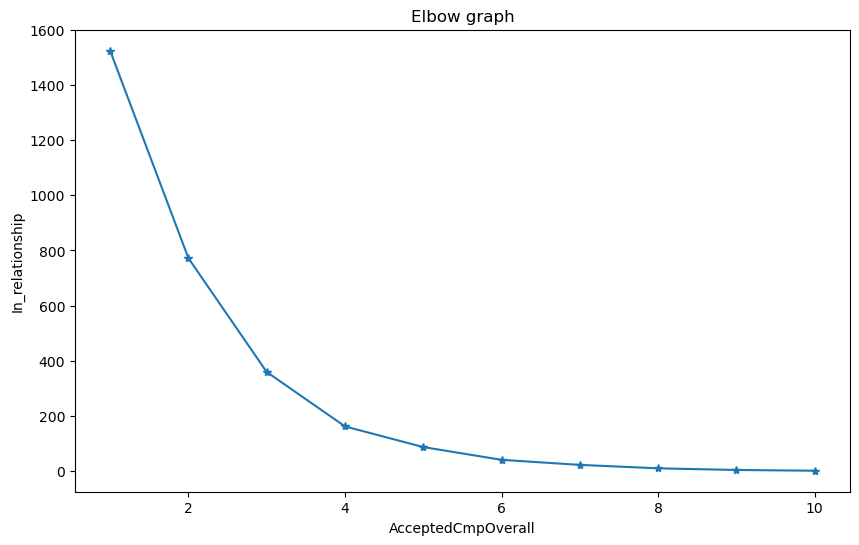

In [282]:
# cluster 1
# in_realtionship and accepted_overall clusterings
x1 = df.loc[:, ['AcceptedCmpOverall', 'In_relationship']].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

#plotting for age and income
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker = '*')
plt.title('Elbow graph')
plt.xlabel('AcceptedCmpOverall')
plt.ylabel('In_relationship')
plt.show()

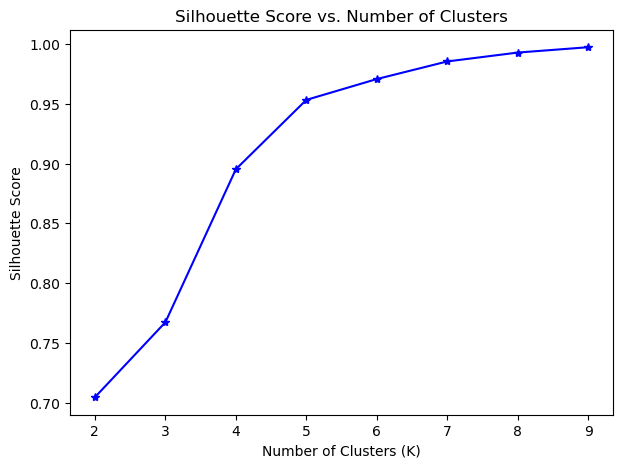

In [283]:
# cluster 1 silhouette score
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, n_init = 10)
    clusters = model.fit_predict(x1)
    s_avg = silhouette_score(x1, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color='b', marker = '*')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [284]:
# cluster 1 k-means prediction
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(x1)
print(labels)

C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 1 ... 0 1 1]


In [285]:
# centroids 
print(kmeans.cluster_centers_)

[[ 1.57608696e-01 -3.10862447e-15]
 [-1.66533454e-15  1.00000000e+00]
 [ 2.48529412e+00  6.54411765e-01]
 [ 1.00000000e+00  1.00000000e+00]]


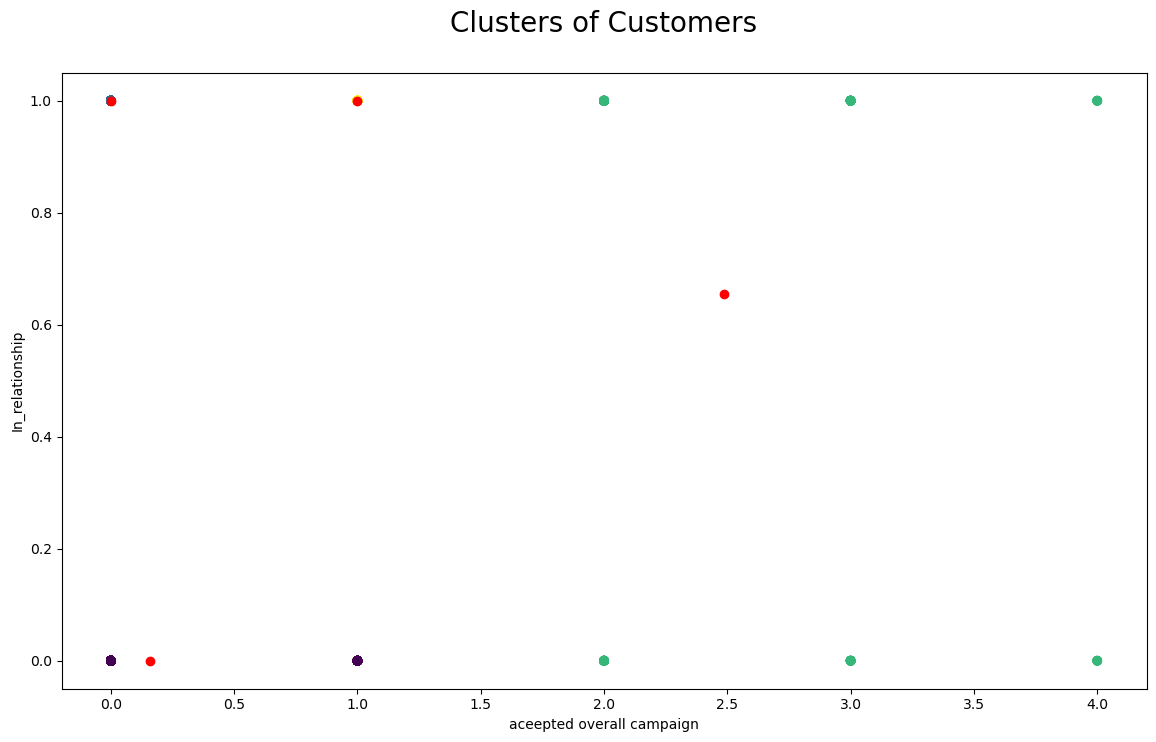

In [286]:
#plotting for age and income clusters
plt.figure(figsize = (14, 8))

plt.scatter(x1[:, 0], x1[:, 1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('aceepted overall campaign')
plt.ylabel('In_relationship')
plt.show()

In [287]:
#cluster 1 report
import pandas as pd

# Assuming labels contains the cluster labels assigned by KMeans
# Create a DataFrame with original data and cluster labels
cluster_df = pd.DataFrame(x1, columns=['AcceptedCmpOverall', 'In_relationship'])
cluster_df['Cluster-1'] = labels
cluster_percentage = cluster_df['Cluster-1'].value_counts(normalize=True) * 100
cluster_percentage = cluster_percentage.rename('Percentage').reset_index()


# Display the DataFrame with cluster percentages
print(cluster_percentage)

   Cluster-1  Percentage
0          1   51.111111
1          0   33.378685
2          3    9.342404
3          2    6.167800


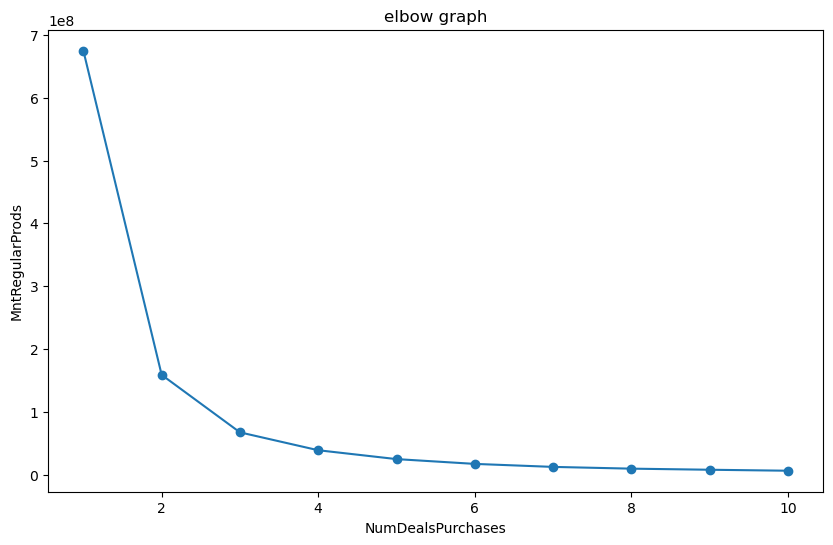

In [276]:
# cluster 2
x2 = df.loc[:, ['NumDealsPurchases', 'MntRegularProds']].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init = 10)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
#plotting for age and products
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('elbow graph')
plt.xlabel('NumDealsPurchases')
plt.ylabel('MntRegularProds')
plt.show()

In [277]:
# k means prediction for cluster 2
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(x2)
print(labels)

C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 3 3 3]


In [278]:
print(kmeans.cluster_centers_)

[[   2.27855888   84.04745167]
 [   2.2715736  1052.27664975]
 [   2.44772727  558.69318182]
 [   2.34763948 1669.02145923]]


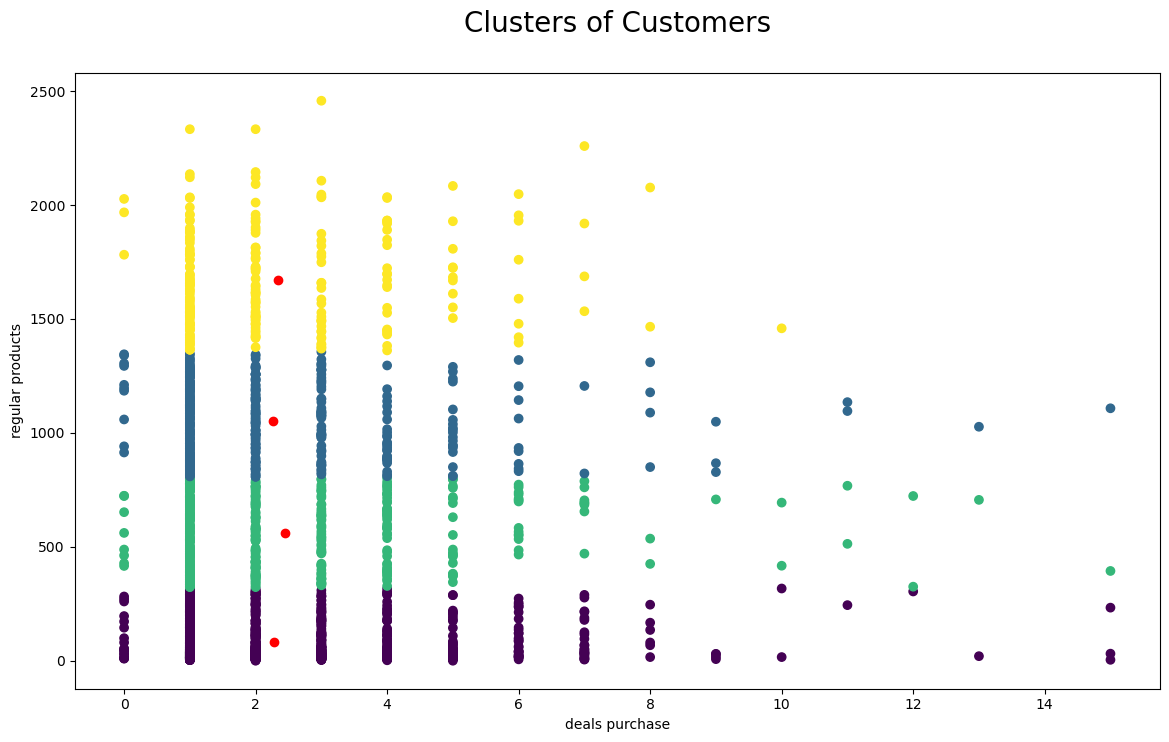

In [279]:
#plotting for cluster 2
plt.figure(figsize = (14,8))

plt.scatter(x2[:, 0], x2[:, 1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('deals purchase')
plt.ylabel('regular products')
plt.show()

In [280]:
#cluster 2 report
import pandas as pd

# Assuming labels contains the cluster labels assigned by KMeans
# Create a DataFrame with original data and cluster labels
cluster_df = pd.DataFrame(x2, columns=['NumDealsPurchases', 'MntRegularProds'])
cluster_df['Cluster-2'] = labels
cluster_percentage = cluster_df['Cluster-2'].value_counts(normalize=True) * 100
cluster_percentage = cluster_percentage.rename('Percentage').reset_index()


# Display the DataFrame with cluster percentages
print(cluster_percentage)

   Cluster-2  Percentage
0          0   51.609977
1          2   19.954649
2          1   17.868481
3          3   10.566893


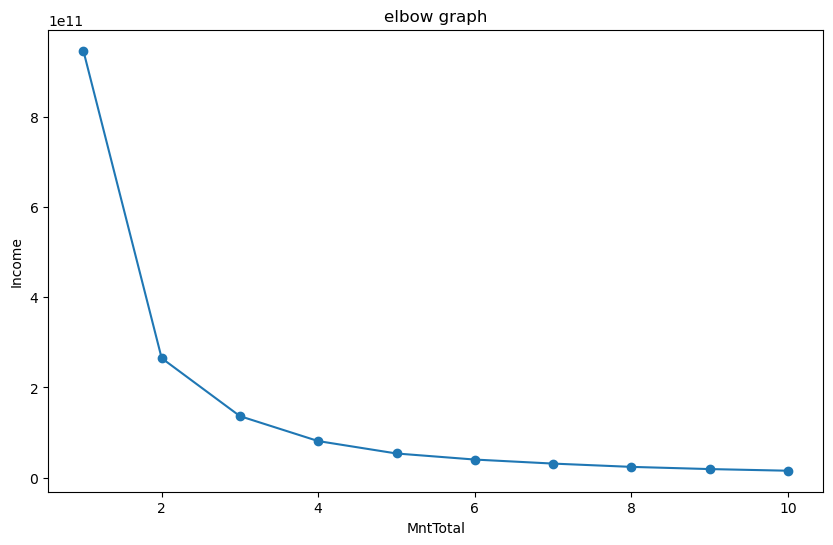

In [270]:
# cluster 3
x3 = df.loc[:, ['Income', 'MntTotal']].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init = 10)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
#plotting for age and products
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('elbow graph')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.show()

In [271]:
# k means prediction for cluster 3
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(x3)
print(labels)

C:\Users\njhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 2 ... 0 0 0]


In [272]:
print(kmeans.cluster_centers_)

[[6.08401645e+04 7.29306452e+02]
 [4.14097858e+04 1.84417565e+02]
 [7.95446442e+04 1.31622904e+03]
 [2.31175280e+04 5.68299776e+01]]


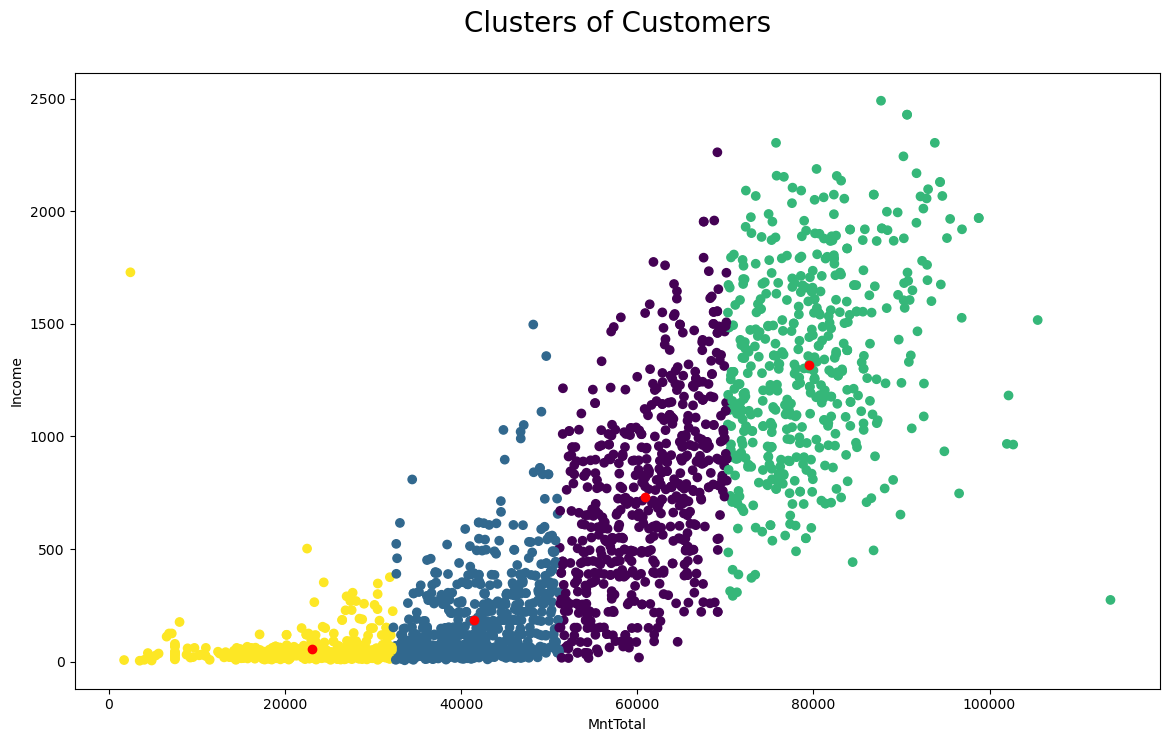

In [273]:
#plotting for cluster 3
plt.figure(figsize = (14, 8))

plt.scatter(x3[:, 0], x3[:, 1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.show()

In [274]:
import pandas as pd

# Assuming labels contains the cluster labels assigned by KMeans
# Create a DataFrame with original data and cluster labels
cluster_df = pd.DataFrame(x3, columns=['Income', 'MntTotal'])
cluster_df['Cluster-3'] = labels
cluster_percentage = cluster_df['Cluster-3'].value_counts(normalize=True) * 100
cluster_percentage = cluster_percentage.rename('Percentage').reset_index()


# Display the DataFrame with cluster percentages
print(cluster_percentage)

   Cluster-3  Percentage
0          1   29.387755
1          0   28.072562
2          2   22.176871
3          3   20.362812


In [ ]:
# Number of clusters = 4
Optimal number of clusters = 4 :

The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). 
The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. 
The silhouette score analysis revealed a peak silhouette score for k=4.

In [ ]:
#Conclusion

In [ ]:
# cluster characteristics for cluster 1:

Results

"This section contains the results of the K-means clustering analysis, which aimed to identify"
"distinct customer segments based on different types of features."
 
feature 1 :
    
    Relationship and Accepted overall campaign offers.

1th Segmentation :
    
    Cluster 1: 
    
        High value customers in relationship (married or together).
        This cluster represents 51% of the customer base.
        These customers have high income and they are in a relationship.
    
    Cluster 2: 
        
        Low value customers in realtionship (married or together).
        This cluster represents 6% of the customer base.
        These customers have low income and they are (married or together).
        
    Cluster o: 
        
        Mid range value customers in realtionship (married or together).
        This cluster represents 33% of the customer base.
        These customers have Mid range of income and they are (married or together).

In [ ]:
feture 2:
    
    Regular products purchase and Deals purchase in ( store or website ).
    
2st Segmentation :
    
    cluster 0 :
        
        High values customers based on their Income and Relationships.
        This cluster represents 51.60% of the customer base.
        These customers have high income and they Purchase Regular Products while Deals.
        
    Cluster 1 :
        
        Mid Level values customers based on their Income and Relationships.
        This cluster represents 20% of the customer base.
        These customers have Mid-level of income and they Purchase Usual Regular Products while the Deals.
        
    Cluster 2 :
        
        Low Level values customers based on their Income and Relationships.
        This cluster represents 10% of the customer base.
        These customers have Low-level of income and they Purchase less Regular Products while the Deals.
        

In [ ]:
feture 3:
    
    products purchase Total amount and Income.
    
3st Segmentation :
    
    cluster 1 :
        
        High values customers based on their products purchase Total amount and Income
        This cluster represents 30% of the customer base.
        These customers have high income and products purchase Total amount
        
    Cluster 0 :
        
        Mid Level values customers based on their products purchase Total amount and Income
        This cluster represents 28% of the customer base.
        These customers have Mid-level of income and products purchase Total amount.
        
    Cluster 3 :
        
        Low Level values customers based on their products purchase Total amount and Income
        This cluster represents 20% of the customer base.
        These customers have Low-level of income and products purchase Total amount.

In [ ]:
Recommendations:
    
    Based on the clusters, tailored marketing strategies can be created. 
    Customers from these segments will have different interests and product preferences.

In [ ]:
Marketing Strategies for Each Cluster or features :
    
    feature 1: 
        
        High value customers in relationship (either married or together).
        Preliminary analysis showed that high income customers buy more wines and fruits.
        A tailored campaign to promote high quality wines may bring good results.
        This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.
        
    feature 2: 
        
        Low value customers in relationship (either married or together).
        Promos with discounts and coupons may bring good results for this targeted group.
        Loyalty program may stimulate these customers to purchase more often.
        
    feature 3: 
        
        High value customers in relationship (either married or together).
        Similar to the Cluster 1, these customers buy a lot of wines and fruits.
        This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for in relationship (either married or together).